# Analytics 512 Homework 4

<p>Arif Ali</p>
03/10/2015

## Exercsise 5.4 #3

###Part A
<p>K fold validation is implimented by first randomly dividing the sets of observations into k groups that should be about equal sizes. The first group (or fold) is treated as the validation set and the method is fit on the remaining k-1 folds. Then the mean-squared error (MSE) is computed for the fold, this method is then repeated on the remaining k-1 folds.</p>
<p>The CV estimate is computed by averaging the various MSEs</p>
$$CV_k = \frac{1}{k}\sum_{i=1}^{k}MSE_{i}$$

###Part B

####i
<p>The advantages of k fold over the validation set approach are:
<ul>the validation estimate of the test error rate can be highly variable</ul>
<ul>There's only one subset used to test and train</ul>
<ul> the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set</ul></p>
<p>The disadvantages of k fold over the validation set approach are:
<ul>The validation method is significiantly easier to impliment since we are splitting only two data sets</ul>
<ul>The validation method has significiantly less bias compared to the k-fold method.</ul>
</p>

####ii
<p>The advantages of k fold over LOOCV approach are:
<ul>The LOOCV is significiantly more comprehensive compared to the k-fold method</ul>
<ul>has a low bias</ul></p>
<p>The disadvantages of k fold over LOOCV approach are:
<ul>While LOOCV has a low bias, the test error can be highly variable as well</ul>
<ul>LOOCV requires going trhough every point, so it requires more time to impliment than k-fold</ul></p>

## Exercsise 5.4 #5

In [2]:
library(ISLR)
attach(Default)

### Part A

In [3]:
glm.default = glm(default~balance, data = Default, family = binomial)

### Part B

#### i

In [4]:
train = sample(nrow(Default), .5*nrow(Default), replace = F)
training = Default[train,]
validation = Default[-train,]

#### ii

In [5]:
glm.default = glm(default~., data = training, family = binomial)

#### iii

In [6]:
pred = predict(glm.default, validation, type = "response")
pred.default = rep(x = "No", times = length(pred))
pred.default[pred>0.5] = "Yes"

#### iv

In [7]:
mean(pred.default != validation$default)

[1] 0.026

I attempted CV by applying K = 10 instead of the validation method as specified by the homework.

In [8]:
glm.default = glm(default~income+balance, data = Default, family = binomial)
cost <- function(r, pi = 0){
    mean(abs(r-pi) > 0.5)
    }
library(boot)
cv.default = cv.glm(Default, glm.default, K = 10)
cv.default$delta

[1] 0.02147382 0.02146987

### Part C

In [9]:
glm.default = glm(default~income+balance, data = Default, family = binomial)
cost <- function(r, pi = 0){
    mean(abs(r-pi) > 0.5)
    }
library(boot)
cv.default = cv.glm(Default, glm.default, cost, K = 10)
cv.default$delta

glm.default = glm(default~income+balance, data = Default, family = binomial)
cost <- function(r, pi = 0){
    mean(abs(r-pi) > 0.5)
    }
library(boot)
cv.default = cv.glm(Default, glm.default, cost, K = 10)
cv.default$delta

glm.default = glm(default~income+balance, data = Default, family = binomial)
cost <- function(r, pi = 0){
    mean(abs(r-pi) > 0.5)
    }
library(boot)
cv.default = cv.glm(Default, glm.default, cost, K = 10)
cv.default$delta

[1] 0.02650 0.02648

[1] 0.02630 0.02632

[1] 0.02640 0.02646

Based on the three runs of the, it seems that the CV error holds between 0.026 to 0.0265. 

### Part D

In [10]:
glm.default = glm(default~income+balance+student, data = Default, family = binomial)
cost <- function(r, pi = 0){
    mean(abs(r-pi) > 0.5)
    }
library(boot)
cv.default = cv.glm(Default, glm.default, cost, K = 10)
cv.default$delta

[1] 0.02680 0.02689

The difference in error seems to by minimal, but lower without the student dummy variable. However, I would argue that the differences between the CV errors are small enough that it wouldn't matter. As to the specific question, adding the student dummy variable does not lead to a reduction in the test errors.

## Exercise 6.8 #1

###Part A
In the case of Best Subset selection, "This task must be performed with care, because the RSS of these p + 1 models decreases monotonically, and the $R^{2}$ increases monotonically, as the number of features included in the models increases." Thus Best Subset selection has the smallest training RSS.


###Part B
Best Subset Selection probably has the smallest test RSS, but it's possible for forward stepwise or backwards stepwise to have a smaller test RSS.

###Part C
####i
True, forward selection adds predictors to a model until it goes through each predictor, adding them if they meet the specified criteria.
####ii
True, Backward selection starts by looking at all $k+1$ predictors, removing ones that don't fit a criteria.
####iii
False, the methods could lead to different models thus one cannot be a subset of the other.
####iv
False,the methods could lead to different models thus one cannot be a subset of the other.
####v
False, since best subset selection looks at all possible comination, there are multiple models with k+1 predictors, so it doesn't the same values as the lower subsets.

## Exercise 6.8 #8

### Part A

In [11]:
X = rnorm(100)
e = rnorm(100)

### Part B

In [12]:
Y = 1 +2*X+3*X^2+4*X^3+e

### Part C

In [13]:
XY = data.frame(Y,X)
names(XY)
library(leaps)
best_selection = regsubsets(Y~poly(X, 10), data = XY,nvmax=10)

[1] "Y" "X"

In [14]:
best_selection_summary = summary(best_selection)

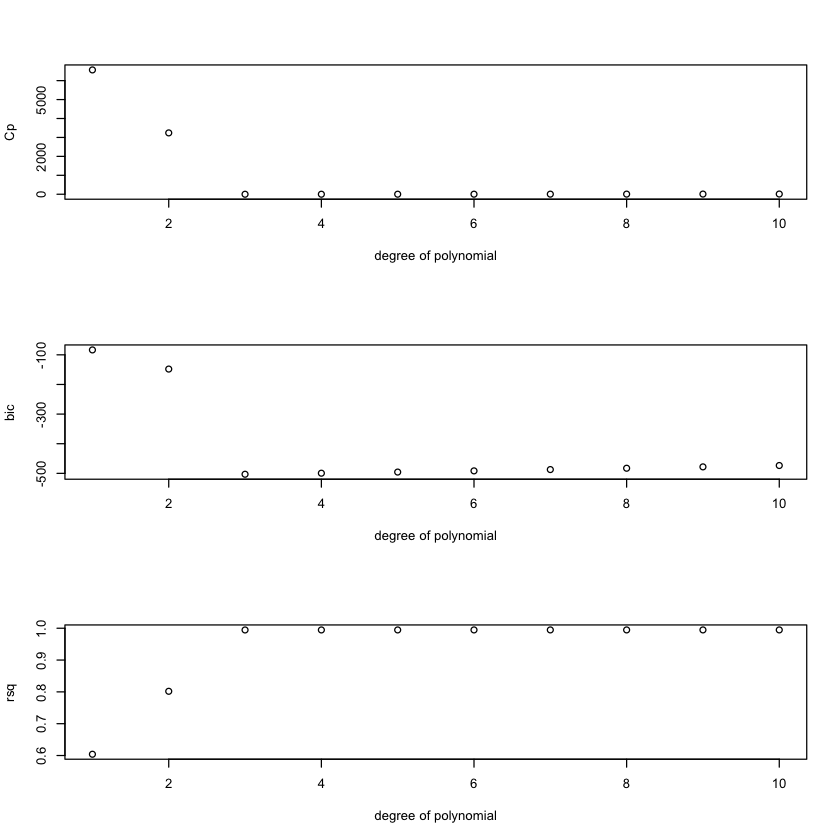

In [15]:
par(mfrow = c(3,1))
plot(best_selection_summary$cp, xlab = "degree of polynomial" , ylab = "Cp")
plot(best_selection_summary$bic, xlab = "degree of polynomial" , ylab = "bic")
plot(best_selection_summary$rsq, xlab = "degree of polynomial" , ylab = "rsq")

In [16]:
print("Based on Cp, the best model is:")
coef(best_selection,which.min(best_selection_summary$cp))
print("Based on BIC, the best model is:")
coef(best_selection,which.min(best_selection_summary$bic))
print("Based on R squared, the best model is:")
coef(best_selection,which.max(best_selection_summary$rsq))

[1] "Based on Cp, the best model is:"


(Intercept) poly(X, 10)1 poly(X, 10)2 poly(X, 10)3 
    3.699839   105.629131    59.666172    60.452827

[1] "Based on BIC, the best model is:"


(Intercept) poly(X, 10)1 poly(X, 10)2 poly(X, 10)3 
    3.699839   105.629131    59.666172    60.452827

[1] "Based on R squared, the best model is:"


(Intercept)  poly(X, 10)1  poly(X, 10)2  poly(X, 10)3  poly(X, 10)4 
   3.69983936  105.62913056   59.66617241   60.45282731   -0.42886284 
 poly(X, 10)5  poly(X, 10)6  poly(X, 10)7  poly(X, 10)8  poly(X, 10)9 
  -0.12377172   -0.31462547   -0.87901973    1.03857084    0.76599543 
poly(X, 10)10 
   0.09881539

###Part D

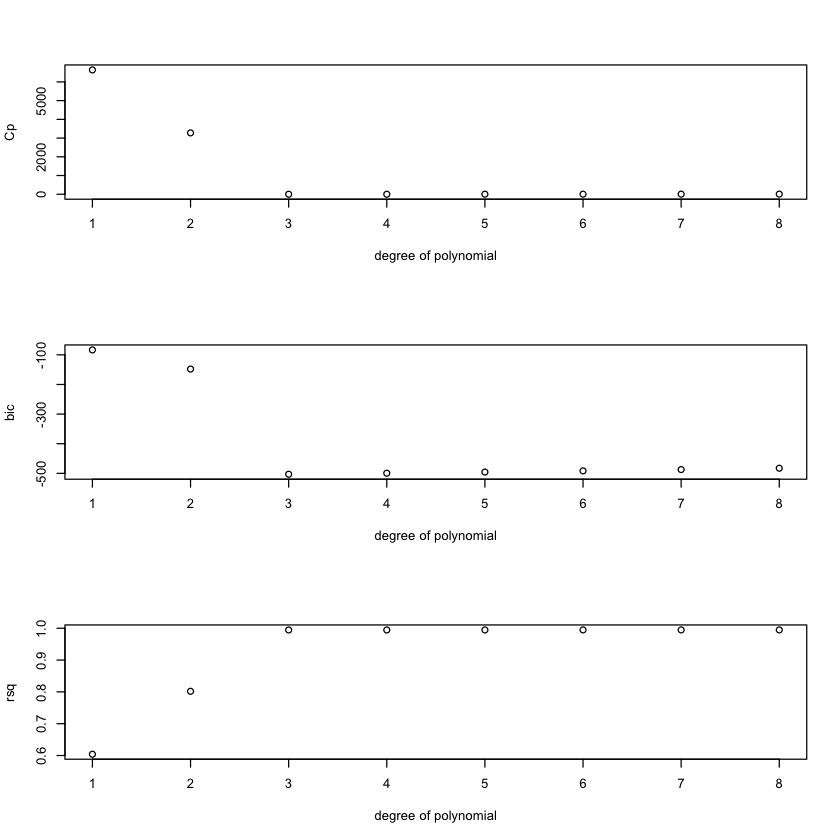

In [17]:
forward_selection = regsubsets(Y~poly(X, 9), data = XY, method ="forward")
forward_selection_summary = summary(forward_selection)
par(mfrow = c(3,1))
plot(forward_selection_summary$cp, xlab = "degree of polynomial" , ylab = "Cp")
plot(forward_selection_summary$bic, xlab = "degree of polynomial" , ylab = "bic")
plot(forward_selection_summary$rsq, xlab = "degree of polynomial" , ylab = "rsq")

In [18]:
print("Based on Cp, the best model is:")
coef(forward_selection,which.min(forward_selection_summary$cp))
print("Based on BIC, the best model is:")
coef(forward_selection,which.min(forward_selection_summary$bic))
print("Based on R squared, the best model is:")
coef(forward_selection,which.max(forward_selection_summary$rsq))

[1] "Based on Cp, the best model is:"


(Intercept) poly(X, 9)1 poly(X, 9)2 poly(X, 9)3 
   3.699839  105.629131   59.666172   60.452827

[1] "Based on BIC, the best model is:"


(Intercept) poly(X, 9)1 poly(X, 9)2 poly(X, 9)3 
   3.699839  105.629131   59.666172   60.452827

[1] "Based on R squared, the best model is:"


(Intercept) poly(X, 9)1 poly(X, 9)2 poly(X, 9)3 poly(X, 9)4 poly(X, 9)6 
  3.6998394 105.6291306  59.6661724  60.4528273  -0.4288628  -0.3146255 
poly(X, 9)7 poly(X, 9)8 poly(X, 9)9 
 -0.8790197   1.0385708   0.7659954

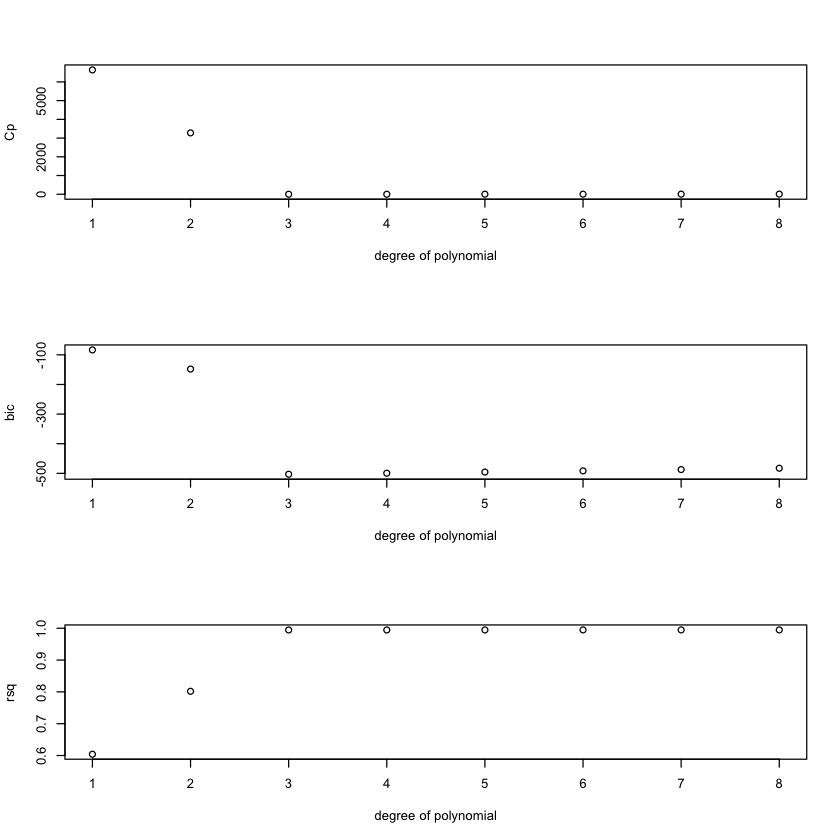

In [19]:
backward_selection = regsubsets(Y~poly(X, 9), data = XY, method ="backward")
backward_selection_summary = summary(backward_selection)
par(mfrow = c(3,1))
plot(backward_selection_summary$cp, xlab = "degree of polynomial" , ylab = "Cp")
plot(backward_selection_summary$bic, xlab = "degree of polynomial" , ylab = "bic")
plot(backward_selection_summary$rsq, xlab = "degree of polynomial" , ylab = "rsq")

In [20]:
print("Based on Cp, the best model is:")
coef(backward_selection,which.min(backward_selection_summary$cp))
print("Based on BIC, the best model is:")

coef(backward_selection,which.min(backward_selection_summary$bic))
print("Based on R squared, the best model is:")

coef(backward_selection,which.max(backward_selection_summary$rsq))

[1] "Based on Cp, the best model is:"


(Intercept) poly(X, 9)1 poly(X, 9)2 poly(X, 9)3 
   3.699839  105.629131   59.666172   60.452827

[1] "Based on BIC, the best model is:"


(Intercept) poly(X, 9)1 poly(X, 9)2 poly(X, 9)3 
   3.699839  105.629131   59.666172   60.452827

[1] "Based on R squared, the best model is:"


(Intercept) poly(X, 9)1 poly(X, 9)2 poly(X, 9)3 poly(X, 9)4 poly(X, 9)6 
  3.6998394 105.6291306  59.6661724  60.4528273  -0.4288628  -0.3146255 
poly(X, 9)7 poly(X, 9)8 poly(X, 9)9 
 -0.8790197   1.0385708   0.7659954

Whereas, Best Subset selection identified a model with all ten polynomials as the best model based on  $R^{2}$, both Forward and Backwards selection dropped the 10th degree polynomial. However, for both BIC and Cp, the Forward and Backward selection was similiar to best subset selection.